In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')
from matplotlib import rc

plt.rc('text', usetex=True)
plt.rc('font', family='sans')

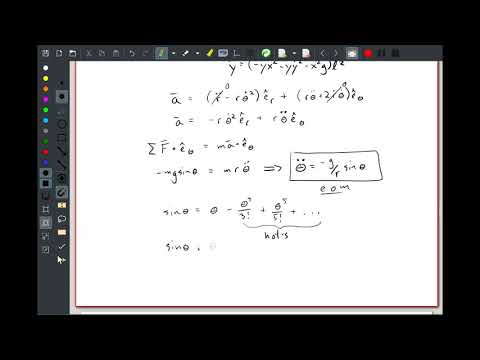

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('NDZkuxp5n9A')

# Pendulum plotting solution

A pendulum is another [harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator), but you have to _linearize_ the equation of motion. The simple pendulum equation of motion is as such

$\ddot{\theta} = -\frac{g}{L}\sin\theta$

where $g$ is acceleration due to gravity and $L$ is the length of the pendulum. 

## Linearize equation of motion

You can't integrate this equation of motion, so you can take a [Taylor series](https://mathworld.wolfram.com/TaylorSeries.html) expansion

$\sin\theta = \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} + ...$

Now, you can use the first term in the series to create the harmonic oscillator equation 

$\ddot{\theta} = -\omega^2 \theta = -\frac{g}{L} \theta$

where $\omega = \sqrt{\frac{g}{L}}$. 

You can see how these Taylor series terms diverge from the actual $\sin$ function below. 

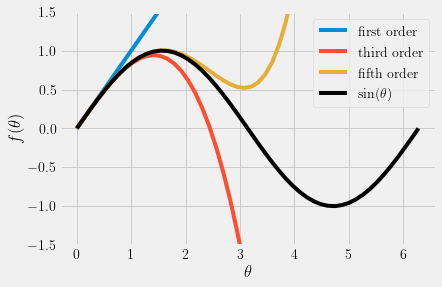

In [13]:
theta = np.linspace(0, 2*np.pi)
order1 = theta
order3 = order1 - theta**3/3/2/1
order5 = order3 + theta**5/5/4/3/2/1

plt.plot(theta, order1, label = 'first order')
plt.plot(theta, order3, label = 'third order')
plt.plot(theta, order5, label = 'fifth order')
plt.plot(theta, np.sin(theta), 'k', label = r'$\sin(\theta)$')
plt.ylim((-1.5, 1.5))
plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$');

## Plot the solution for the linearized simple pendulum

The solution to the harmonic oscillator is given as such

$\theta(t) = \theta_0 \cos\omega t + \frac{\dot{\theta}_0}{\omega}\sin\omega t$

where $\theta_0$ is the initial angle of the pendulum and $\dot{\theta}_0$ is the initial angular velocity of the pendulum (+ counter-clockwise/ - clockwise motion). 

Below, you plot the solution for 1 period of motion for a L = 0.5-m pendulum released from rest at $\theta_0 = 10^o = \frac{\pi}{18}~rad$. 

> __Note__: the time period, $T=\frac{2\pi}{\omega}~s$ is the time for to move right-to-left, then left-to-right, to its initial position. 

Text(0, 0.5, '$\\theta$ (deg)')

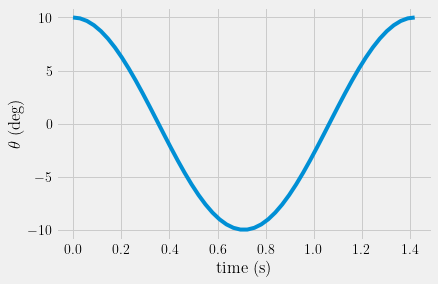

In [18]:
L = 0.5 # m
w = np.sqrt(9.81/L)
t = np.linspace(0, 2*np.pi/w)
theta = np.pi/18*np.cos(w*t)
plt.plot(t, theta*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta$ (deg)')


## Motion of the pendulum

The solution plotted above is the orientation of the pendulum. The position of the mass is

$\mathbf{r} = L\hat{e}_r = L(\sin\theta \hat{i} - \cos\theta \hat{j})$

where $\theta = \theta(t)$ that you created above. Below, you plot the x- and y- positions of the simple pendulum. 

Text(0, 0.5, 'position (m)')

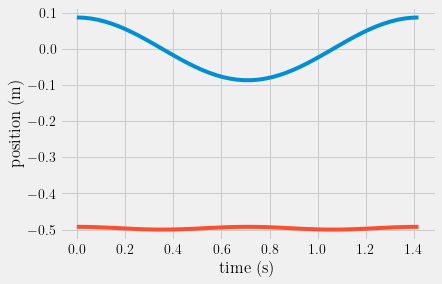

In [55]:
r = L*np.vstack([np.sin(theta), -np.cos(theta)])

plt.plot(t, r[0,:], label = 'x-location')
plt.plot(t, r[1,:], label = 'y-location')
plt.xlabel('time (s)')
plt.ylabel('position (m)')

> __Note__: Notice how the x-position has a similar shape to the solution for $\theta(t)$, but the y-position has very little variation. The angle $\theta$ is small, $\theta<<1$, so you can approximate the position as 
>
> $\mathbf{r} = L(\sin\theta \hat{i} - \cos\theta \hat{j}) \approx L\theta\hat{i} - L\hat{j}$
>
> because the Taylor series expansion for $\cos(\theta)$ is 
>
> $\cos\theta = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} + ...$
>
> so you can approximate $\cos\theta \approx 1$. 

## Animation of the pendulum motion

Here, you can see how the pendulum swings. It starts at $\theta_0=10^o$ and swings left to $\theta(t=T/2)=-10^o$. In this simple pendulum model, you did not include any effects of air resistance, friction, or damping so the motion will continue to oscillate until acted upon by another system. 

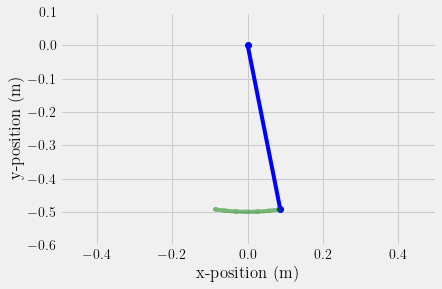

In [56]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.5, 0.5))
ax.set_ylim((-0.6, 0.1))
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')

line1, = ax.plot([], [],'bo-')
ax.plot(r[0,:],r[1,:],'g--', alpha=0.5)

from matplotlib import animation
from IPython.display import HTML

def init():
    line1.set_data([], [])
    return (line1, )

def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    '''
    line1.set_data([0, r[0, i]], [0, r[1, i]])
    return (line1, )

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(t)), interval=50, 
                               blit=True)

HTML(anim.to_html5_video())

## Wrapping up

In this notebook, you plotted the solution for a simple pendulum and used the kinematic definitions to plot the motion of the pendulum. 